## Naive Bayes Classification

Teorema de Bayes

$P(A|B) = \frac{P(A)P(B|A)}{P(B)}$

Ejemplo: Clasificador de Spam

¿Cuál es la probabilidad de que un email sea spam si contiene la palabra 'gratis'?

$$P(Spam|Gratis) = \frac{P(Spam)P(gratis|spam)}{P(gratis)}$$

\\

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

Hay distintos modelos:

- Gaussian NB
- Categorical NB
- Bernoulli NB


Tomar en cuenta:

* El SUPUESTO de este algoritmo es que los atributos de nuestra data son independientes. 

* Hay que tener cuidado con esto, en la vida real y en la mayoría de los datasets esto no es así; pero justo de aquí surge el "naive".

* Sin embargo, es un excelente modelo para clasificar de forma inicial, porque lo hace generalmente bien y es rápido. 


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import make_blobs, load_wine, fetch_20newsgroups
from sklearn.metrics import plot_confusion_matrix

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/ReynaldoMR3/clases_ih/main/emails.csv')
data.head()

,message,class
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",spam
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,spam
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,spam
3,##############################################...,spam
4,I thought you might like these:\n\n1) Slim Dow...,spam


In [ ]:
data['class'].value_counts()

ham     2500
spam     500
Name: class, dtype: int64

In [ ]:
data['class'].unique()

array(['spam', 'ham'], dtype=object)

In [ ]:
data['is_spam'] = np.where(data['class']=='spam',1,0)

In [ ]:
data['is_spam'].value_counts()

0    2500
1     500
Name: is_spam, dtype: int64

In [ ]:
# data['is_spam'] = data['class'].apply(lambda x:1 if x == 'spam' else 0)

In [ ]:
#Vectorizar
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(data['message'])
y = data['is_spam']

In [ ]:
X[:3].toarray()

array([[1, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
tokens = vectorizer.get_feature_names()

In [ ]:
df_vect = pd.DataFrame(data = X.toarray(),columns=tokens)
df_vect.head()

,00,000,0000,000000,000000000,000000000000000000000,00000254,000033,000058,000066,000071,000077,000080,00008b,000099,0000a0,0000bf,0000c4,0000cc,0000ek,0000ff,0001011,0001015,000107,0001123,000184,000185,000187,000188,000190,000191,000193,000194,000197,000198,0001pt,0001zd,000200,000201,000202,...,üà,üãâµäò,üçñ,üçø¼,üè,üôâèº,üöüèº,ýký,ýle,ýngýlýzce,ýnternette,ýyý,ýµé,ýµéàì,ýµû,ýà,ýàûàî,ýáõ,ýáõº,ýáõà,ýáõàº,ýáõàì,ýçin,ýê,ýóÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿj,ýöøäã,þemarketer¹àó,þu¼ÿ9,þ³é,þà,þàì,þàìå,þàï,þàïà,þàïàº,þàïáö¼ò,þîñ,þõµ,þüg,ÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿó
0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state =666)

In [ ]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_predict = classifier.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_predict)

array([[512,   0],
       [ 16,  72]])

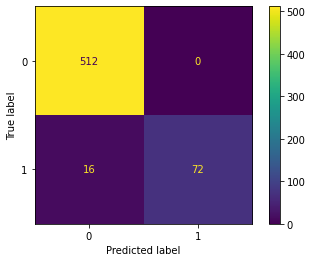

In [ ]:
plot_confusion_matrix(classifier,X_test,y_test,values_format = '')

In [ ]:
examples = ['You can SAVE hundreds, reply and get a free coupon',
            'Hi, how about a game of poker tomorrow night?', 
            'free coupon inside', 
            "I've been expecting you Mr. Anderson" ]

example_counts = vectorizer.transform(examples)


In [ ]:
predictions = classifier.predict(example_counts)
predictions

array([1, 0, 1, 0])

In [ ]:
# Creamos funcionion para probar demás modelos.
# Recibe dependiente, independietne y modelo
def mfunc(X, y, typ):
    """
    Function that trains a model and gives you some evaluating metrics
    """
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                        random_state=666)

    model = typ
    clf = model.fit(X_train, y_train)

    pred_labels = model.predict(X_test)
    # Clases de los datos
    print('Classes: ', clf.classes_) # class labels known to the classifier

    model_name = str(typ).split('(')[0]
    if model_name =='GaussianNB':
      # It is calculated by simply counting the number of different labels in your training sample.
        print('Class Priors: ',clf.class_prior_) # prior probability of each class.
    else: 
        print('Class Log Priors: ',clf.class_log_prior_) # log prior probability of each class.
        
    print('--------------------------------------------------------')
    score = model.score(X_test, y_test)
    print('Accuracy Score: ', score)
    print('--------------------------------------------------------')
    
    print(classification_report(y_test, pred_labels))
    
    return X_train, X_test, y_train, y_test, clf, pred_labels

In [ ]:
X_train, X_test, y_train, y_test, clf, pred_labels = mfunc( X, y, MultinomialNB())

Classes:  [0 1]
Class Log Priors:  [-0.18833963 -1.76220067]
--------------------------------------------------------
Accuracy Score:  0.9733333333333334
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       512
           1       1.00      0.82      0.90        88

    accuracy                           0.97       600
   macro avg       0.98      0.91      0.94       600
weighted avg       0.97      0.97      0.97       600



In [ ]:
examples_predict = clf.predict_proba(example_counts)
examples_predict.round(2)

array([[0.03, 0.97],
       [1.  , 0.  ],
       [0.46, 0.54],
       [0.98, 0.02]])

In [ ]:
X_train, X_test, y_train, y_test, clf, pred_labels = mfunc( X, y, BernoulliNB())

Classes:  [0 1]
Class Log Priors:  [-0.18833963 -1.76220067]
--------------------------------------------------------
Accuracy Score:  0.9066666666666666
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       512
           1       0.90      0.41      0.56        88

    accuracy                           0.91       600
   macro avg       0.90      0.70      0.76       600
weighted avg       0.91      0.91      0.89       600



In [ ]:
examples_predict = clf.predict_proba(example_counts)
examples_predict.round(2)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

## Naive Bayes Gaussian

Usamos distribuciones gaussianas para representar nuestros datos.

Nos sirve para clasificar

Empezamos con una suposición inicial, puede ser cualquier probabilidad que queramos pero lo usual es obtener una probabilidad del dataset de entrenamiento.

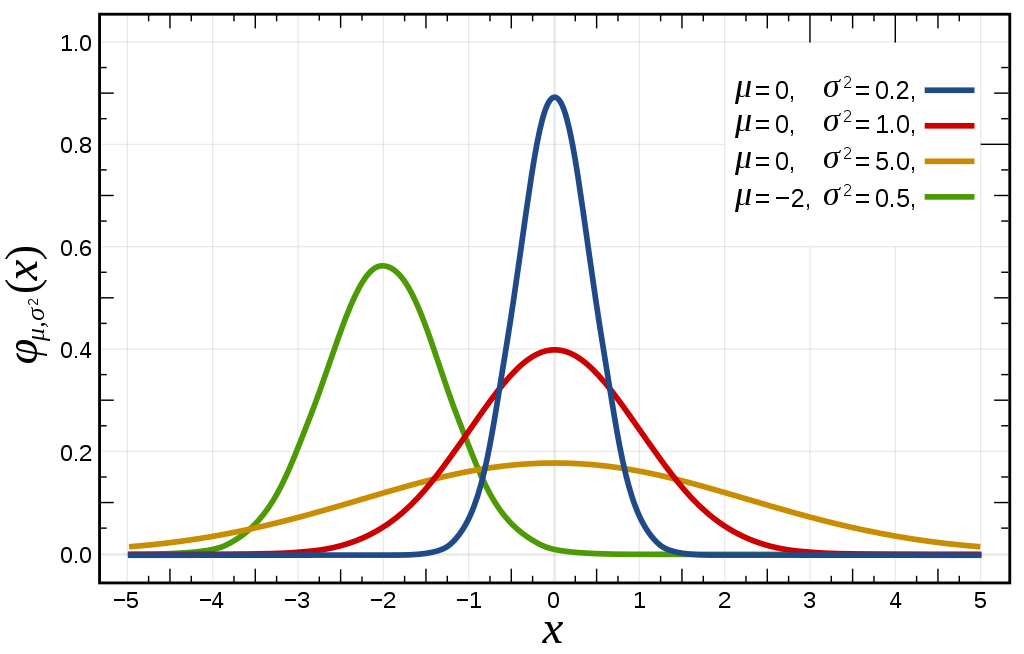

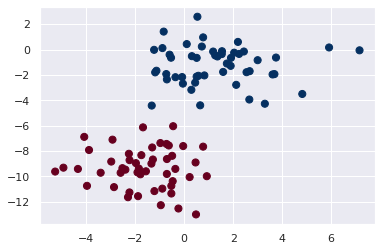

In [ ]:
sns.set()
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [ ]:
model = GaussianNB()
model.fit(X,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
rng = np.random.RandomState(777)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

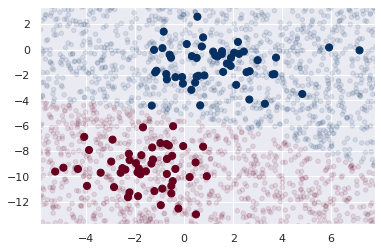

In [ ]:
# Ploteamos los nuevos y el original para verlo 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [ ]:
data=load_wine()

In [ ]:
print(data.DESCR)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=.3, random_state=666)

In [ ]:
df = pd.DataFrame(X_train, columns= data.feature_names)
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,124.000000,124.000000,124.000000,124.00000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.00000,124.000000,124.000000
mean,13.076210,2.379839,2.388065,19.45000,101.290323,2.282823,2.002500,0.362823,1.573548,5.203548,0.94400,2.588548,763.346774
std,0.782082,1.090947,0.274758,3.35335,14.383128,0.636711,1.031619,0.125332,0.564443,2.365543,0.22916,0.719925,307.647514
min,11.450000,0.890000,1.360000,10.60000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.48000,1.290000,278.000000
25%,12.420000,1.625000,2.257500,17.00000,89.750000,1.715000,1.090000,0.270000,1.250000,3.360000,0.77750,1.850000,520.000000
50%,13.095000,1.895000,2.375000,19.50000,98.000000,2.335000,2.120000,0.340000,1.560000,4.910000,0.96000,2.780000,680.000000
75%,13.712500,3.132500,2.582500,21.50000,110.000000,2.800000,2.807500,0.455000,1.877500,6.212500,1.10500,3.170000,996.250000
max,14.830000,5.650000,3.230000,28.50000,162.000000,3.880000,5.080000,0.660000,3.280000,13.000000,1.42000,3.920000,1680.000000


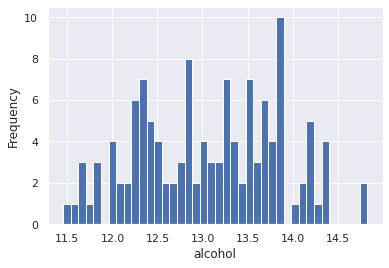

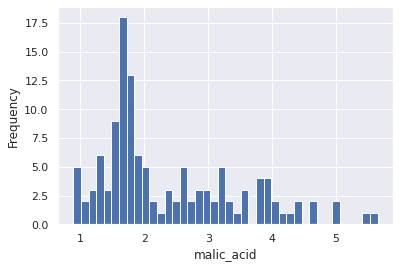

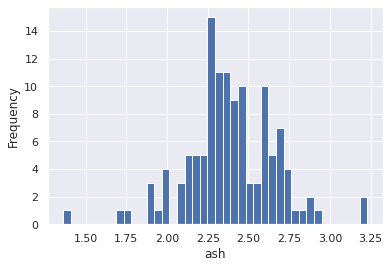

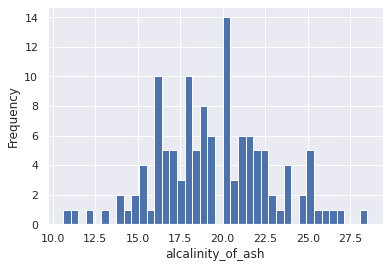

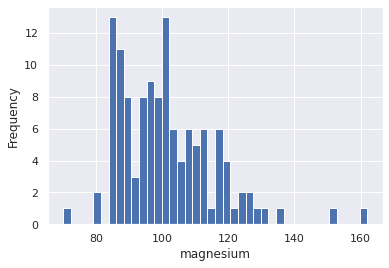

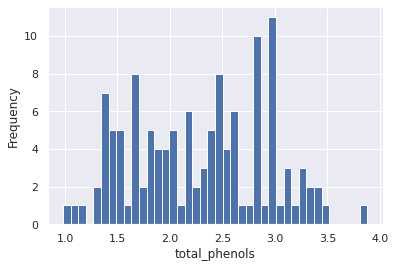

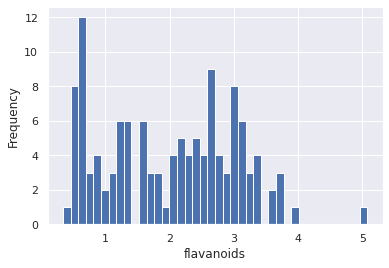

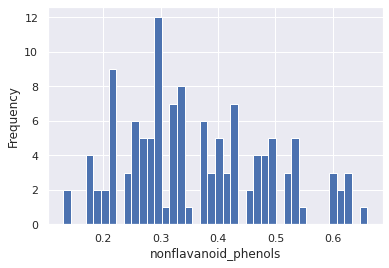

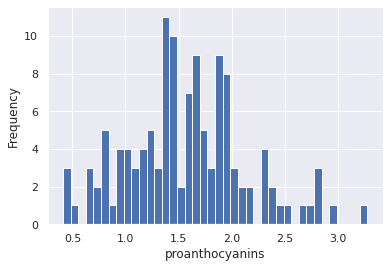

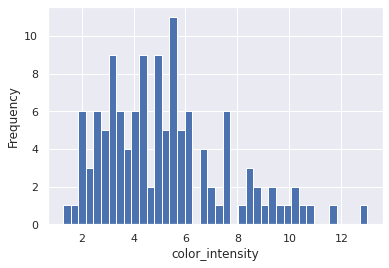

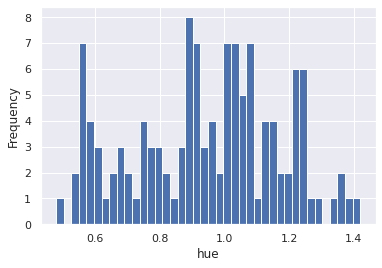

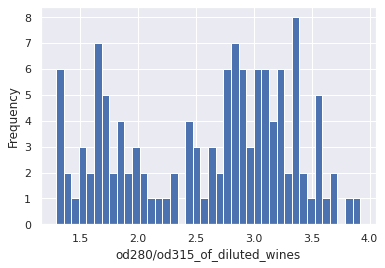

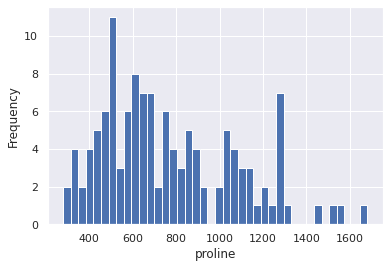

In [ ]:
# Verlo por clase para ver si cumple el supuesto. z
for i in df.columns:
  plt.figure()
  fig = df[i].plot(kind='hist', bins=40)
  fig.set_xlabel(i)
  plt.show()

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print('Accuracy:', accuracy_score(y_test,y_pred))

Accuracy: 0.9629629629629629


In [ ]:
 X_train, X_test, y_train, y_test, clf, pred_labels = mfunc(data['data'],data['target'],GaussianNB())

Classes:  [0 1 2]
Class Priors:  [0.34507042 0.35915493 0.29577465]
--------------------------------------------------------
Accuracy Score:  0.9722222222222222
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.95      0.97        20
           2       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36

